# 다중 퍼셉트론으로 손글씨 분류하기

MNIST데이터랑 다른 데이터

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

## 데이터 확인

In [7]:
'''
load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.
'''
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

#첫번째 샘플을 출력해보겠습니다.
#images[인덱스]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있습니다.
print(digits.images[0])
print(digits.target[0])

#샘플 개수 확인
print("전체 샘플 개수: {}".format(len(digits.images)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
전체 샘플 개수: 1797


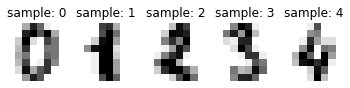

In [9]:
#전체 샘플 중에서 상위 5개의 샘플만 시각화해봅시다.
images_and_labels = list(zip(digits.images, digits.target))
#print(images_and_labels[0])
for index, (image,label) in enumerate(images_and_labels[:5]): #0-4. 5개의 샘플 출력
  plt.subplot(2, 5, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
  plt.title('sample: %i' %label)

훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다. 더 나은 방법은 digts.data를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [10]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [12]:
X = digits.data #이미지 8*8=64차원의 벡터
Y = digits.target #각 이미지에 대한 label(0-9)
print("length of X is {}".format(len(X)))
print("Shape of X is {}".format(X.shape))
print("length of Y is {}".format(len(Y)))

length of X is 1797
Shape of X is (1797, 64)
length of Y is 1797


## 다층 퍼셉트론 분류기 만들기

Epoch    0/100 Cost: 2.411224
Epoch   10/100 Cost: 1.968032
Epoch   20/100 Cost: 1.557535
Epoch   30/100 Cost: 1.119932
Epoch   40/100 Cost: 0.749652
Epoch   50/100 Cost: 0.503826
Epoch   60/100 Cost: 0.352744
Epoch   70/100 Cost: 0.263259
Epoch   80/100 Cost: 0.208978
Epoch   90/100 Cost: 0.173582


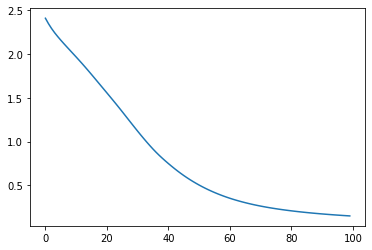

In [14]:
import torch
import torch.nn as nn
from torch import optim

# for reproducibility
torch.manual_seed(777)

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32,16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16,10) # hidden_layer3 = 16, output_layer = 10
    #crossEntropy 비용함수는 softmax함수를 포함하고 있음
)

#torchTensor로 바꾸기
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

#비용함수와 옵티마이저 설정
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())

losses = []

#training
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

plt.plot(losses)